In [1]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from plotter import Plotter
%matplotlib inline

In [2]:
## set the dir of the results
train_file = './results/train_e_B.csv'
test_file = './results/test_e_B.csv'
## set the save path
path = './figures/ResNet_exits_BIBD.png'

train = genfromtxt(train_file, delimiter = ',').T
test = genfromtxt(test_file, delimiter = ',').T

In [3]:
# split the data into shape (number of exits, epoches)
train_loss = train[[0, 2, 4], :]
train_acc = train[[1, 3, 5], :]
test_loss = test[[0, 2, 4], :]
test_acc = test[[1, 3, 5], :]

In [4]:
plotter = Plotter(title="ResNet with three exits and BIBD",
                         save_to_filepath=path)

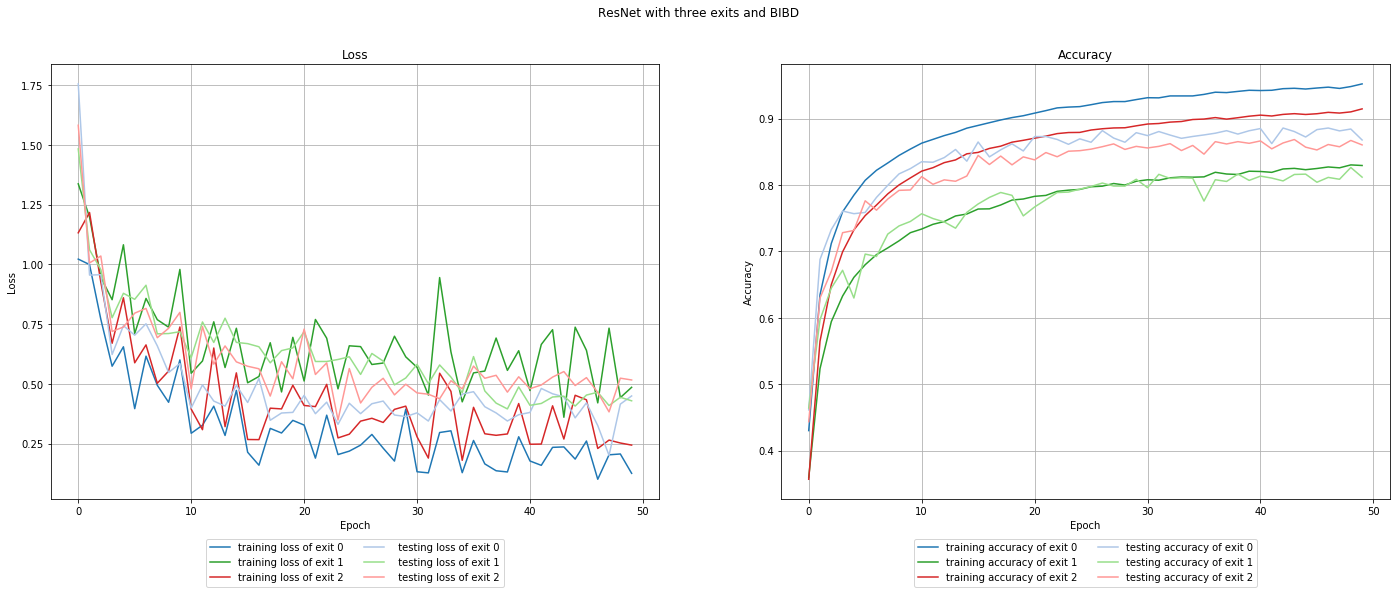

In [5]:
plotter.plot_values(train_loss, test_loss, train_acc, test_acc)